In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import deepchem as dc
# import chemfp
# import chemfp.bitops
# from rdkit.Chem import rdFingerprintGenerator
# from rdkit import Chem
# from rdkit import Chem
# from rdkit import DataStructs
# import rdkit



In [2]:
df = pd.read_csv('./gens/0_5.txt')

In [3]:
df

,deviation,gen_target,gen_input,target_percent,input_percent,total_input_fraction,unique_ratio,unique_elements_len,calc_time,long_ratio,new_percent
0,0.0,0.000077,0.001536,0.263158,0.026316,0.004981,0.000029,38,50.117938,0.552632,0.157895
1,0.1,0.000077,0.001536,0.156250,0.015625,0.004981,0.000049,64,50.035676,0.531250,0.296875
2,0.2,0.000077,0.001536,0.105263,0.010526,0.004981,0.000073,95,49.976304,0.442105,0.442105
3,0.3,0.000108,0.001536,0.099291,0.007092,0.004981,0.000108,141,49.820853,0.397163,0.496454
4,0.4,0.000146,0.001536,0.094527,0.004975,0.004981,0.000154,201,49.877968,0.388060,0.512438
...,...,...,...,...,...,...,...,...,...,...,...
56,5.2,0.003114,0.006144,0.027504,0.000272,0.004981,0.011253,14725,58.286529,0.768217,0.204007
57,5.3,0.002884,0.006144,0.025164,0.000268,0.004981,0.011389,14902,58.651634,0.775533,0.199034
58,5.4,0.002961,0.006144,0.025282,0.000263,0.004981,0.011638,15228,58.852797,0.782046,0.192409
59,5.5,0.003107,0.006144,0.025853,0.000256,0.004981,0.011943,15627,59.088160,0.779100,0.194791


In [4]:
gen_target = df['gen_target'].tolist()
gen_input= df['gen_input'].tolist()
deviation = df['deviation'].tolist()
input_percent =df['input_percent'].tolist()
new_percent = df['new_percent'].tolist()
target_percent = df['target_percent'].tolist()
long_ratio = df['long_ratio'].tolist()
unique_elements_len = df['unique_elements_len'].tolist()

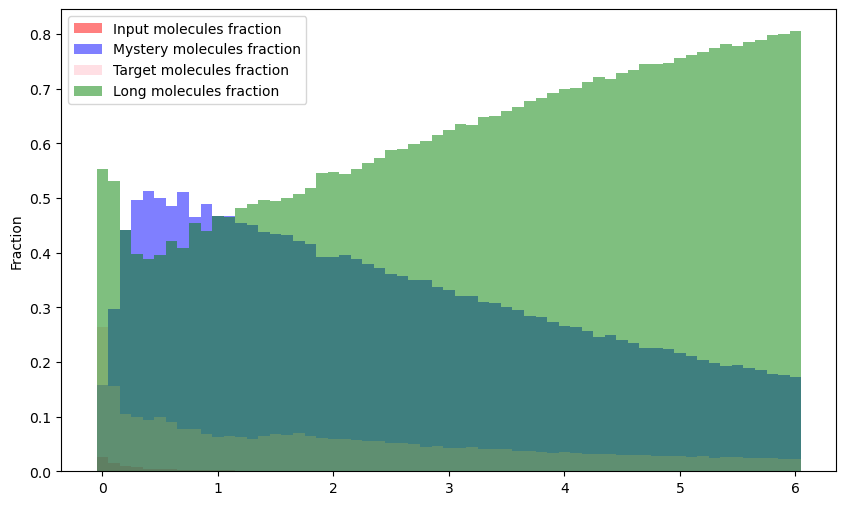

In [5]:
bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))
plt.bar(deviation, input_percent, width=bar_width, alpha=0.5, label='Input molecules fraction', color = 'red')
plt.bar(deviation, new_percent, width=bar_width, alpha=0.5, label='Mystery molecules fraction', color = 'blue')
plt.bar(deviation, target_percent, width=bar_width, alpha=0.5, label='Target molecules fraction', color = 'pink')
plt.bar(deviation, long_ratio, width=bar_width, alpha=0.5, label='Long molecules fraction', color = 'green')



plt.xlabel('')
plt.ylabel('Fraction')
plt.legend()
plt.show()

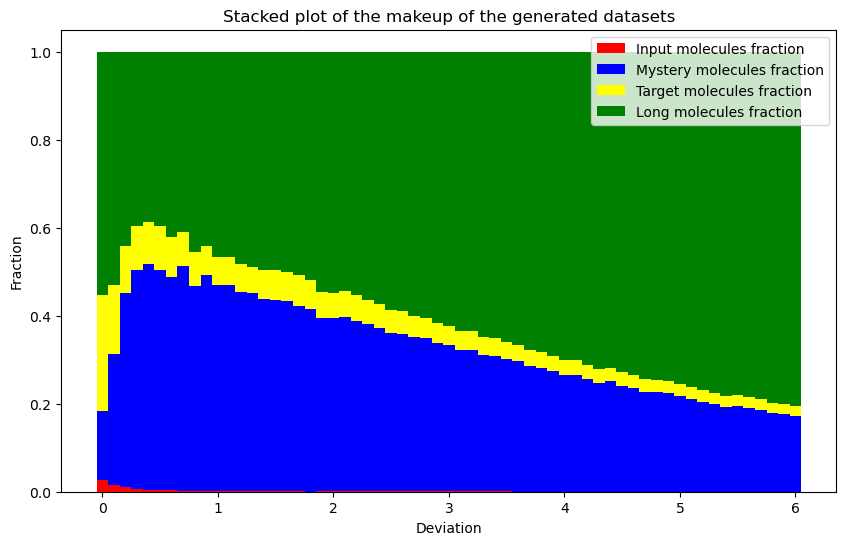

In [6]:
import matplotlib.pyplot as plt


bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))
plt.bar(deviation, input_percent, width=bar_width, label='Input molecules fraction', color='red')
plt.bar(deviation, new_percent, width=bar_width, label='Mystery molecules fraction', color='blue', bottom=input_percent)
plt.bar(deviation, target_percent, width=bar_width, label='Target molecules fraction', color='yellow', bottom=[i + j for i, j in zip(input_percent, new_percent)])
plt.bar(deviation, long_ratio, width=bar_width, label='Long molecules fraction', color='green', bottom=[i + j + k for i, j, k in zip(input_percent, new_percent, target_percent)])

plt.xlabel('Deviation')
plt.ylabel('Fraction')
plt.title('Stacked plot of the makeup of the generated datasets')
plt.legend()
plt.show()


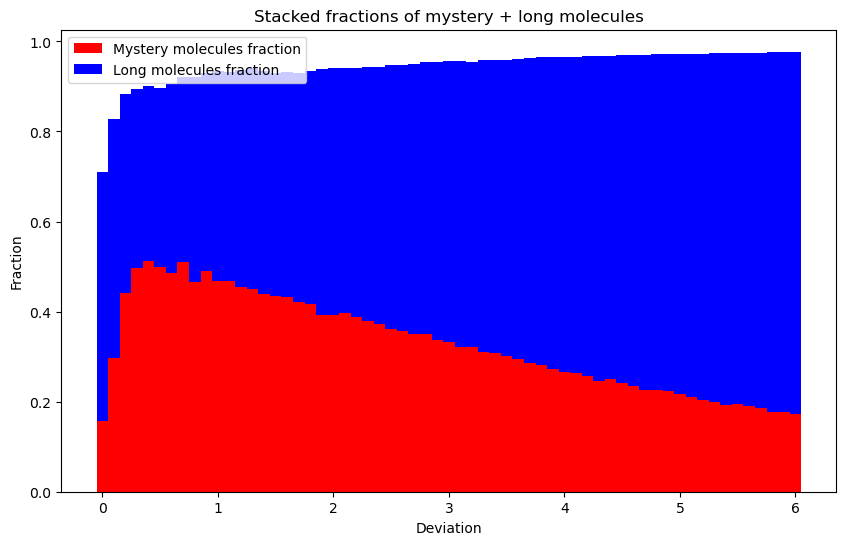

In [7]:
bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))
plt.bar(deviation, new_percent, width=bar_width, label='Mystery molecules fraction', color='red')
plt.bar(deviation, long_ratio, width=bar_width, label='Long molecules fraction', color='blue', bottom=new_percent)

plt.xlabel('Deviation')
plt.ylabel('Fraction')
plt.title('Stacked fractions of mystery + long molecules')
plt.legend()
plt.show()


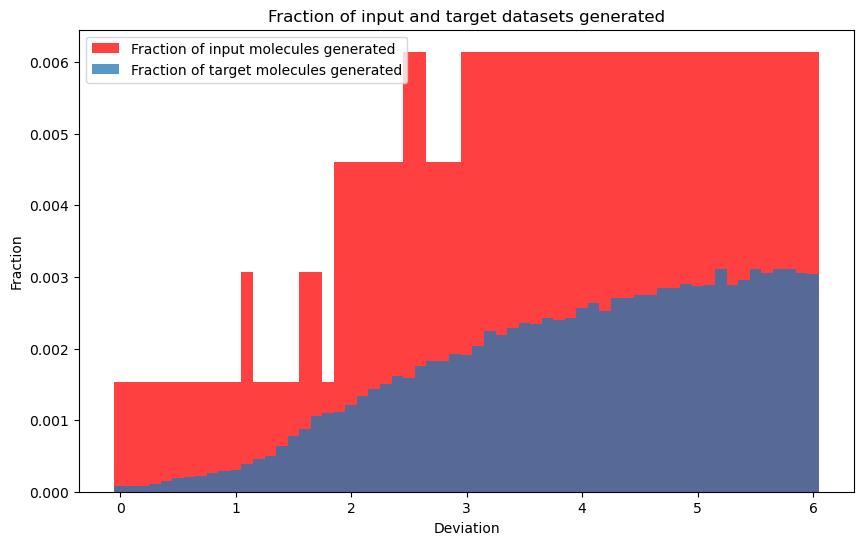

In [8]:
bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))
plt.bar(deviation, gen_input, width=bar_width, alpha=0.75, label='Fraction of input molecules generated', color='red')
plt.bar(deviation, gen_target, width=bar_width, alpha=0.75, label='Fraction of target molecules generated')


plt.xlabel('Deviation')
plt.ylabel('Fraction')
plt.title('Fraction of input and target datasets generated')
plt.legend()
plt.show()


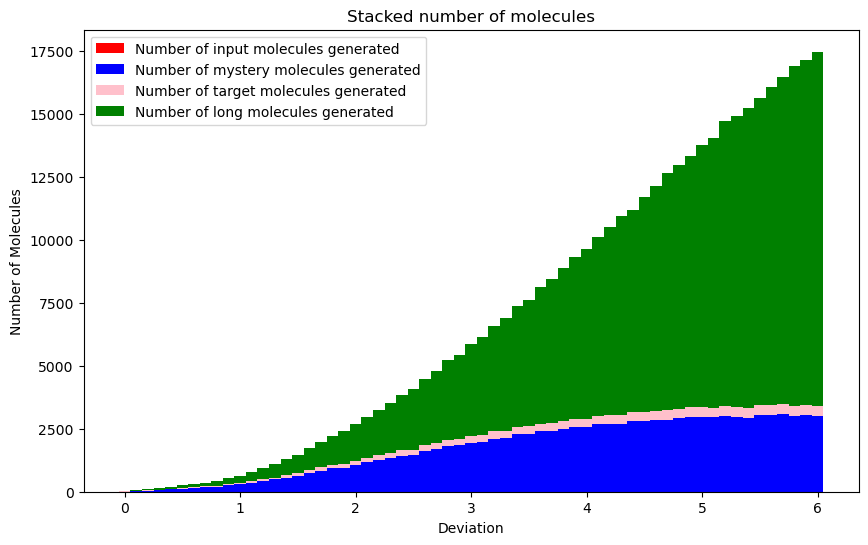

In [9]:
import matplotlib.pyplot as plt

# Your data

total_molecules_generated = unique_elements_len

bar_width = deviation[1] - deviation[0]

plt.figure(figsize=(10, 6))

for i in range(len(deviation)):
    deviation_i = deviation[i]
    
    # Calculate the actual number of molecules for each category for the current deviation
    input_count = input_percent[i] * total_molecules_generated[i]
    new_count = new_percent[i] * total_molecules_generated[i]
    target_count = target_percent[i] * total_molecules_generated[i]
    long_count = long_ratio[i] * total_molecules_generated[i]

    if deviation_i == max(deviation):

        plt.bar(deviation_i, input_count, width=bar_width, label='Number of input molecules generated', color='red')
        plt.bar(deviation_i, new_count, width=bar_width, label='Number of mystery molecules generated', color='blue', bottom=input_count)
        plt.bar(deviation_i, target_count, width=bar_width, label='Number of target molecules generated', color='pink', bottom=input_count + new_count)
        plt.bar(deviation_i, long_count, width=bar_width, label='Number of long molecules generated', color='green', bottom=input_count + new_count + target_count)
    else:
        plt.bar(deviation_i, input_count, width=bar_width, color='red')
        plt.bar(deviation_i, new_count, width=bar_width, color='blue', bottom=input_count)
        plt.bar(deviation_i, target_count, width=bar_width, color='pink', bottom=input_count + new_count)
        plt.bar(deviation_i, long_count, width=bar_width, color='green', bottom=input_count + new_count + target_count)

plt.xlabel('Deviation')
plt.ylabel('Number of Molecules')
plt.title('Stacked number of molecules')
plt.legend()
plt.show()

